# **Segmented Analysis of Smartwatch Data: Heart Rate vs. Other Parameters**

In this notebook, we conducted an analysis of smartwatch data, which is stored in JSON format. Our analysis revealed that the heart rate parameter exhibits one structure, while other parameters exhibit a different structure. To address this discrepancy, we developed two distinct code segments:

1. The first segment is designed to retrieve and visualize data related to the heart rate parameter.
2. The second segment is dedicated to retrieving data related to other parameters and visualizing them.

By structuring our code in this manner, we ensure clarity and efficiency in our analysis process, allowing for focused examination of each parameter type. This approach enhances readability and maintainability, facilitating better understanding and interpretation of the results.

In [ ]:
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# Path to the JSON file
file_path = "/content/sample_data/SmartWatch-Data.json"

# Read the JSON file into a pandas DataFrame
df = pd.read_json(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   message  code                                               data
0  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...
1  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...
2  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...
3  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...
4  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...


In [ ]:
# Path to the JSON file
file_path = "/content/sample_data/SmartWatch-Data.json"

# Read the JSON file into a pandas DataFrame
df = pd.read_json(file_path)

# Function to extract specific fields from the 'data' column
def extract_fields(data):
    return data.get('userName', None), data.get('eventType', None), data.get('receivedDate', None)

# Apply the function to the 'data' column and create new columns
df[['userName', 'eventType', 'receivedDate']] = df['data'].apply(lambda x: pd.Series(extract_fields(x)))


# Display the first few rows of the DataFrame
print(df.head())


   message  code                                               data  userName  \
0  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...   LPD P02   
1  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...   LPD P02   
2  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...   LPD P02   
3  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...   LPD P02   
4  success     0  {'userName': ' LPD P02', 'userEmail': 'partici...   LPD P02   

  eventType              receivedDate  
0  intraday  2024-03-16T10:12:41.000Z  
1  intraday  2024-03-16T10:12:41.000Z  
2  intraday  2024-03-16T10:12:41.000Z  
3  intraday  2024-03-16T10:12:41.000Z  
4  intraday  2024-03-16T10:12:41.000Z  


# **Retriving Heart Rate Data**
The provided code segment aims to extract data related to heart rate parameter from a JSON file and structure it into a DataFrame.







In [ ]:
# Load the JSON data from a file
with open('/content/sample_data/SmartWatch-Data.json', 'r') as file:
    json_data = json.load(file)

# Extract the first set of data fields
first_data = []
for entry in json_data['data']:
    user_data = {
        'userName': entry['userName'],
        'eventType': entry['eventType'],
        'receivedDate': entry['receivedDate']
    }
    first_data.append(user_data)

# Create a dataframe for the first set of data
main_df = pd.DataFrame(first_data)

# Extract the second set of data fields including time, value, and now userName
second_data = []
for entry in json_data['data']:
    event_data = {
        'userName': entry['userName'],  # Add userName here
        'event': entry['data']['event'],
        'externalId': entry['data'].get('externalId', None),
        'brandId': entry['data'].get('brandId', None),
        'date': entry['data'].get('date', None),
        'version': entry['data'].get('version', None),
        'parameter': entry['data'].get('parameter', None),
        'time': None,
        'value': None
    }
    if 'data' in entry['data'] and isinstance(entry['data']['data'], list):
        for data_entry in entry['data']['data']:
            if isinstance(data_entry, dict) and 'time' in data_entry and 'value' in data_entry:
                event_data['time'] = data_entry['time']
                event_data['value'] = data_entry['value']
                second_data.append(event_data.copy())  # Make a copy to avoid overwriting
    else:
        print("Skipping entry due to missing or invalid data structure:", entry)

# Create a dataframe for the second set of data
HearRate_df = pd.DataFrame(second_data)

# Display the dataframes
print("First DataFrame:")
print(main_df)
print("\nSecond DataFrame:")
print(HearRate_df)


Skipping entry due to missing or invalid data structure: {'userName': ' LPD P02', 'userEmail': 'participant02@example.com', 'eventType': 'update', 'receivedDate': '2024-03-16T10:15:38.000Z', 'data': {'event': 'update', 'data': {'externalUserId': 'qMpLLXdiGK', 'brandId': '8', 'parameters': [{'value': 112, 'unit': 'bpm', 'parameter': 'max_heart_rate', 'parameter_id': 'max_heart_rate', 'date': '2024-03-15'}, {'value': 89, 'unit': 'bpm', 'parameter': 'average_heart_rate', 'parameter_id': 'average_heart_rate', 'date': '2024-03-15'}, {'value': 52, 'unit': 'bpm', 'parameter': 'min_heart_rate', 'parameter_id': 'min_heart_rate', 'date': '2024-03-15'}]}}}
Skipping entry due to missing or invalid data structure: {'userName': ' LPD P02', 'userEmail': 'participant02@example.com', 'eventType': 'update', 'receivedDate': '2024-03-16T10:15:40.000Z', 'data': {'event': 'update', 'data': {'externalUserId': 'qMpLLXdiGK', 'brandId': '8', 'parameters': [{'value': 112, 'unit': 'bpm', 'parameter': 'max_heart_r

In [ ]:
HearRate_df

,userName,event,externalId,brandId,date,version,parameter,time,value
0,LPD P02,intraday,qMpLLXdiGK,8,2024-03-15,1,heart,09:34:00,92
1,LPD P02,intraday,qMpLLXdiGK,8,2024-03-15,1,heart,09:35:00,94
2,LPD P02,intraday,qMpLLXdiGK,8,2024-03-15,1,heart,09:36:00,94
3,LPD P02,intraday,qMpLLXdiGK,8,2024-03-15,1,heart,09:37:00,94
4,LPD P02,intraday,qMpLLXdiGK,8,2024-03-15,1,heart,09:38:00,94
...,...,...,...,...,...,...,...,...,...
69649,LPD P06,intraday,uQFfxOyBa9,8,2024-03-17,1,heart,22:23:00,68
69650,LPD P06,intraday,uQFfxOyBa9,8,2024-03-17,1,heart,22:24:00,68
69651,LPD P06,intraday,uQFfxOyBa9,8,2024-03-17,1,heart,22:25:00,68
69652,LPD P06,intraday,uQFfxOyBa9,8,2024-03-17,1,heart,22:26:00,69


In [ ]:
# Get the distinct count of the 'parameter' column
parameter_counts = HearRate_df['parameter'].value_counts()
# Display the distinct count of each parameter
print("Parameter counts:", parameter_counts)


# Check unique values in 'userName' and 'date' columns
print("\nUnique user names:", HearRate_df['userName'].unique())
print("Unique dates:", HearRate_df['date'].unique())


Parameter counts: heart    69654
Name: parameter, dtype: int64

Unique user names: [' LPD P02' ' LPD P06']
Unique dates: ['2024-03-15' '2024-03-14' '2024-03-16' '2024-03-17']


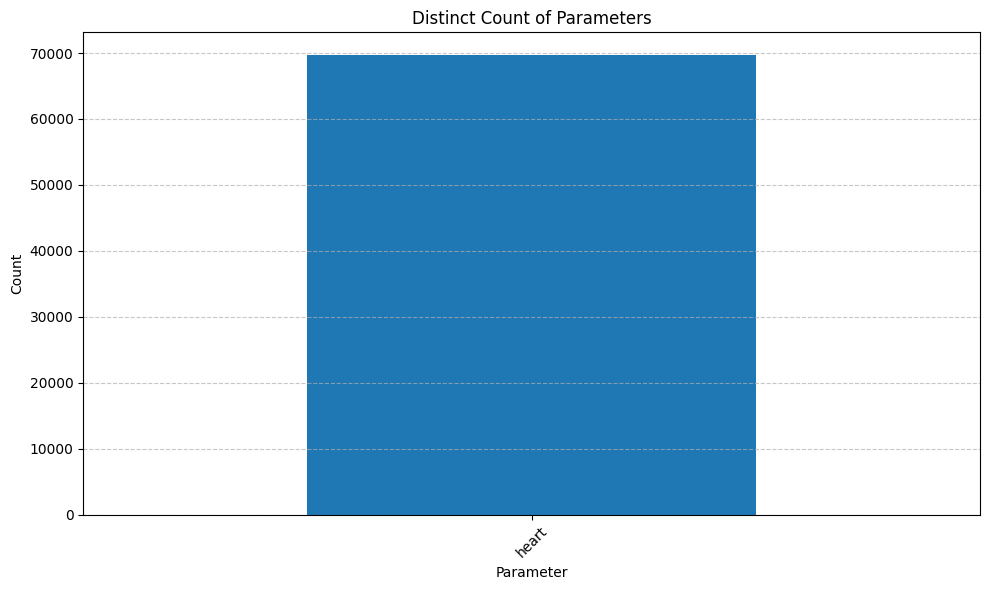

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
parameter_counts.plot(kind='bar')
plt.title('Distinct Count of Parameters')
plt.xlabel('Parameter')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



<Figure size 1200x600 with 0 Axes>

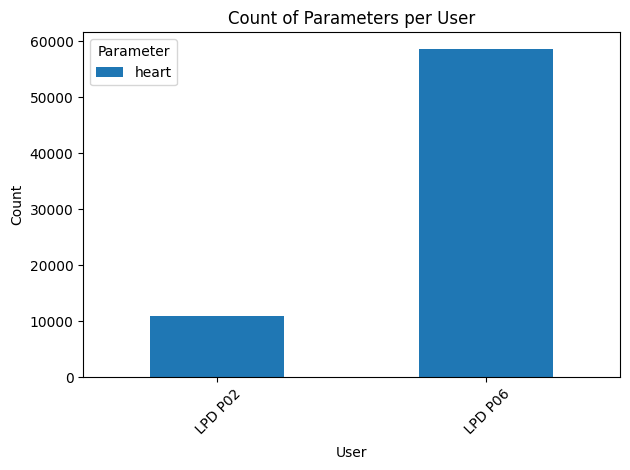

In [ ]:
# Group by 'userName' and 'parameter' and count occurrences
parameter_counts_per_user = HearRate_df.groupby(['userName', 'parameter']).size().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
parameter_counts_per_user.plot(kind='bar', stacked=True)
plt.title('Count of Parameters per User')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Parameter')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


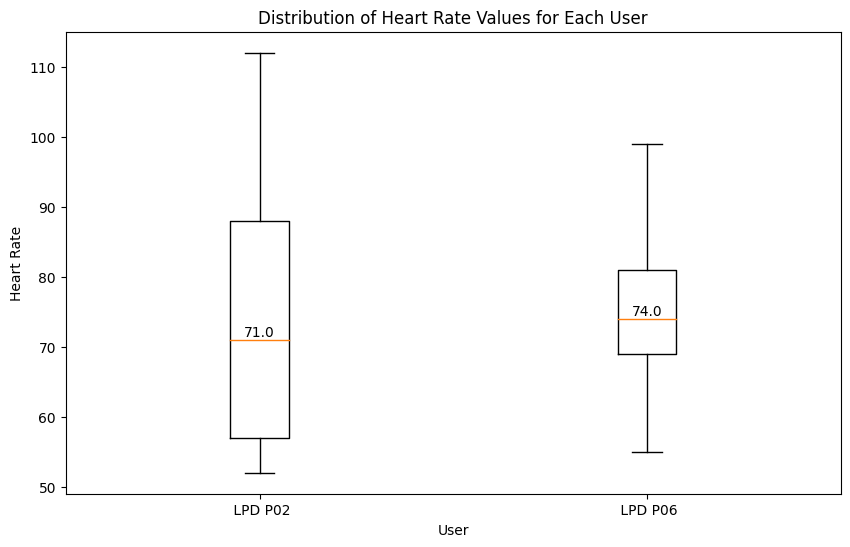

In [ ]:
# Group the DataFrame by 'userName' to create separate groups for each user
grouped_df = HearRate_df.groupby('userName')

# Initialize an empty list to store heart rate values for each user
heart_rate_data = []

# Extract heart rate values for each user and store them in the list
for user_name, group in grouped_df:
    heart_rate_data.append(group['value'].values)

# Create a box plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(heart_rate_data, labels=grouped_df.groups.keys(), showfliers=False)

# Add median values to each boxplot
for i, user_name in enumerate(grouped_df.groups.keys()):
    median = np.median(heart_rate_data[i])
    plt.text(i + 1, median, f'{median}', horizontalalignment='center', verticalalignment='bottom')

plt.title('Distribution of Heart Rate Values for Each User')
plt.xlabel('User')
plt.ylabel('Heart Rate')
plt.show()


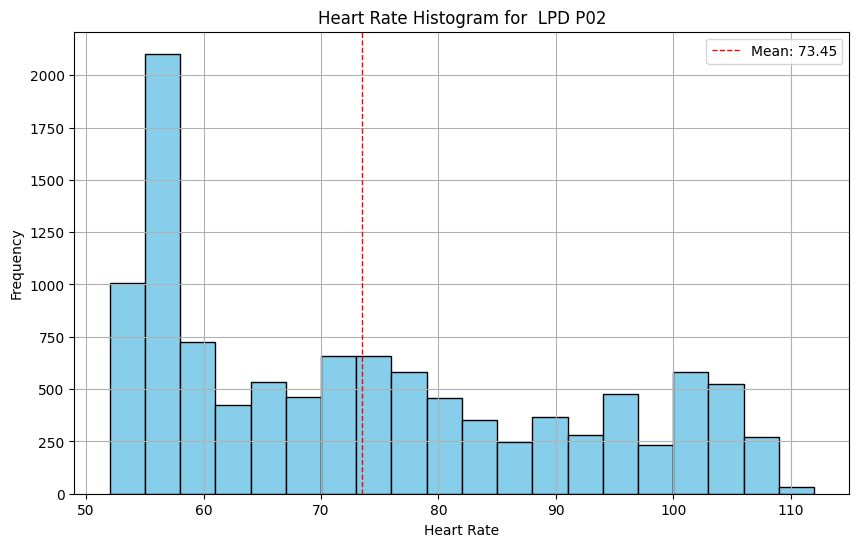

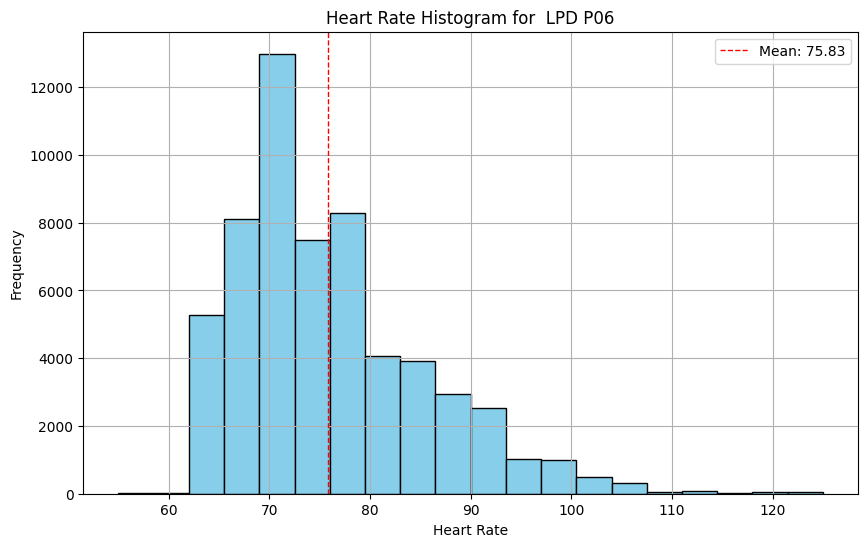

In [ ]:
# Group the DataFrame by 'userName'
grouped_by_user = second_df.groupby('userName')

# Iterate over each user group
for user_name, group in grouped_by_user:
    # Create a histogram for the current user's heart rate values
    plt.figure(figsize=(10, 6))
    plt.hist(group['value'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Heart Rate Histogram for {user_name}')
    plt.xlabel('Heart Rate')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Calculate mean and standard deviation
    mean_hr = np.mean(group['value'])
    std_hr = np.std(group['value'])

    # Add mean and standard deviation lines to the plot
    plt.axvline(mean_hr, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_hr:.2f}')

    plt.legend()

    plt.show()


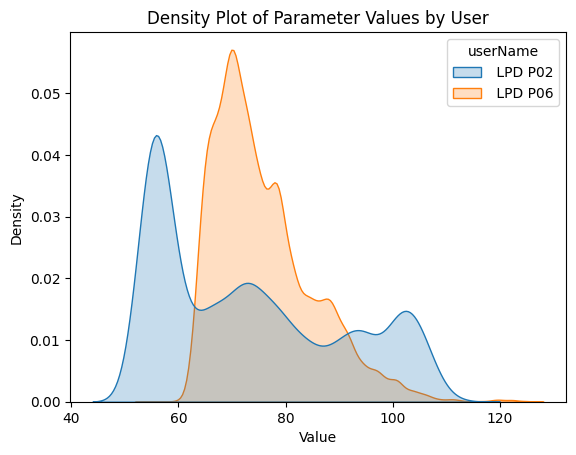

In [ ]:
# Density Plots
sns.kdeplot(data=second_df, x='value', hue='userName', fill=True, common_norm=False)
plt.title('Density Plot of Parameter Values by User')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

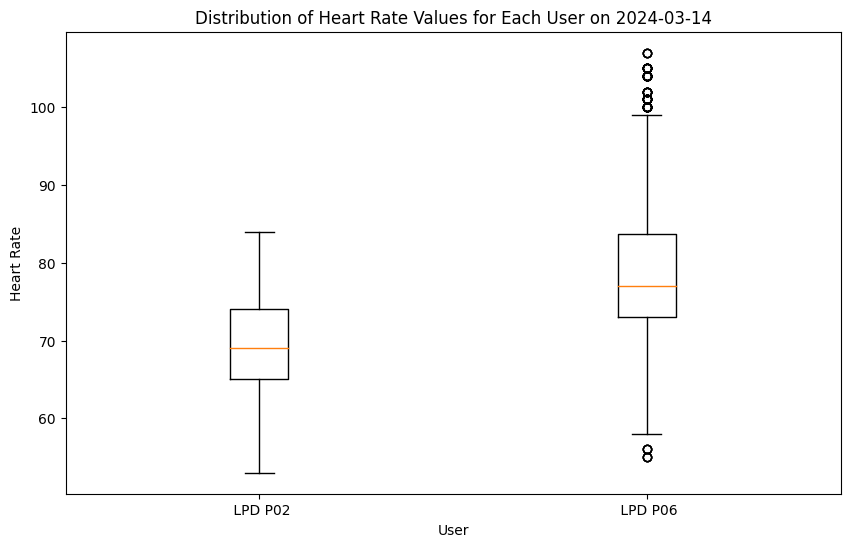

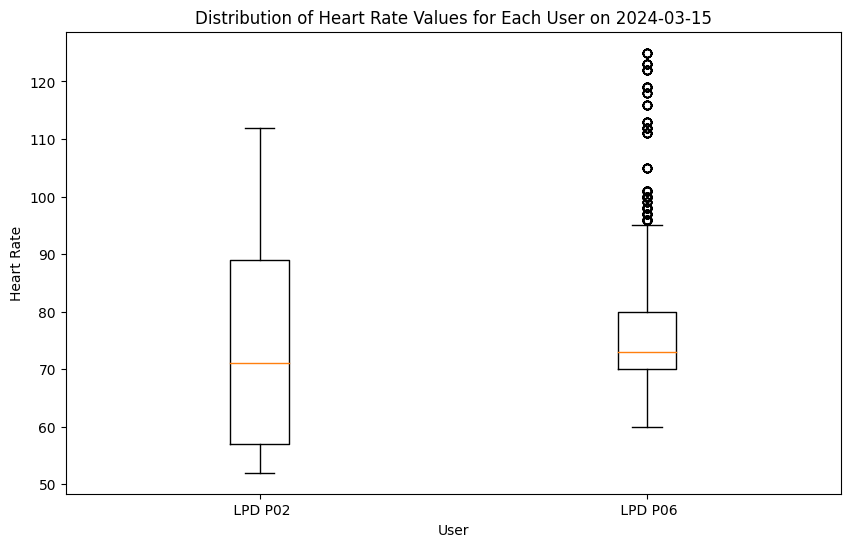

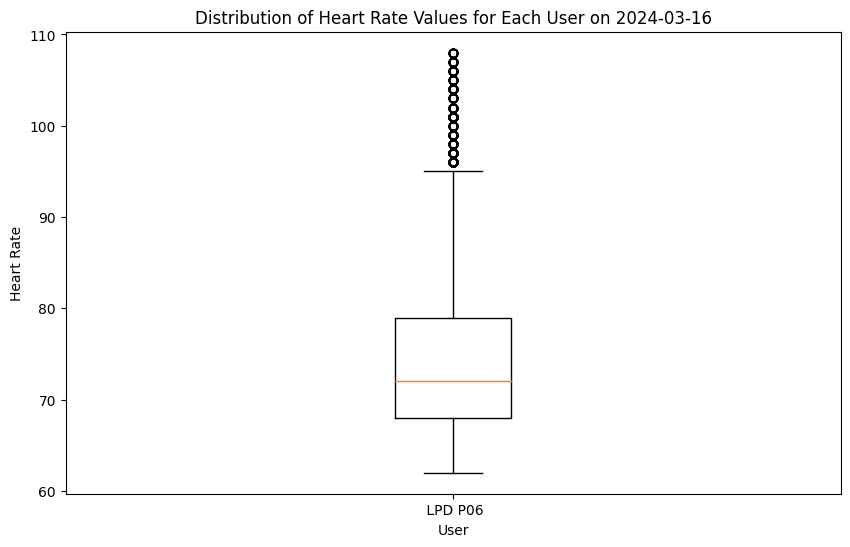

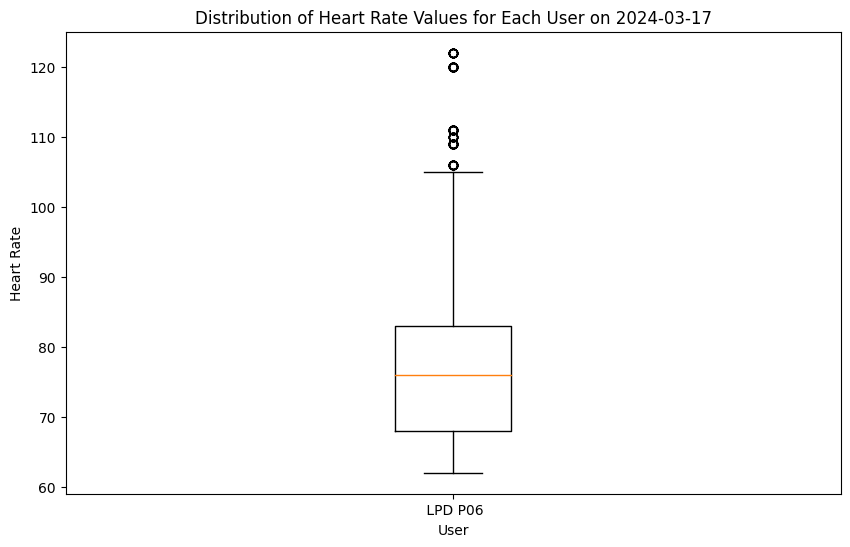

In [ ]:
# Convert the 'date' column to datetime format
HearRate_df['date'] = pd.to_datetime(HearRate_df['date'])

# Group the DataFrame by 'date' to create separate groups for each day
grouped_by_date = HearRate_df.groupby('date')

# Iterate over each date group
for date, group in grouped_by_date:
    # Initialize an empty list to store heart rate values for each user on the current day
    heart_rate_data = []

    # Group the data by 'userName' for the current day
    grouped_by_user = group.groupby('userName')

    # Extract heart rate values for each user and store them in the list
    for user_name, user_group in grouped_by_user:
        heart_rate_data.append(user_group['value'].values)

    # Create a box plot for the current day
    plt.figure(figsize=(10, 6))
    plt.boxplot(heart_rate_data, labels=grouped_by_user.groups.keys())
    plt.title(f'Distribution of Heart Rate Values for Each User on {date.date()}')
    plt.xlabel('User')
    plt.ylabel('Heart Rate')
    plt.show()


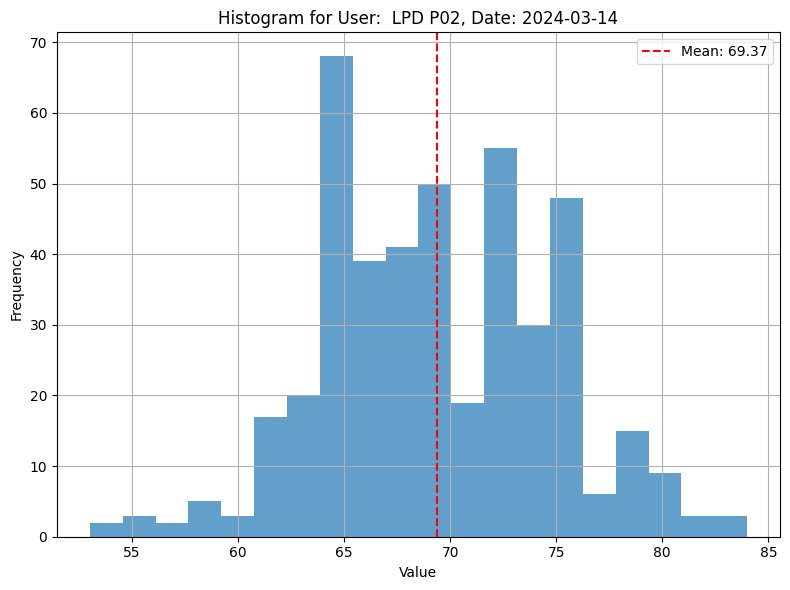

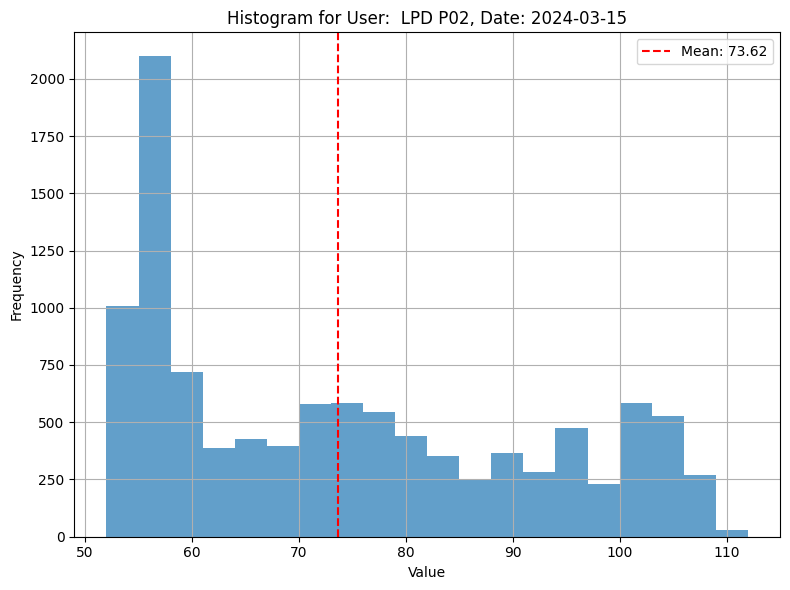

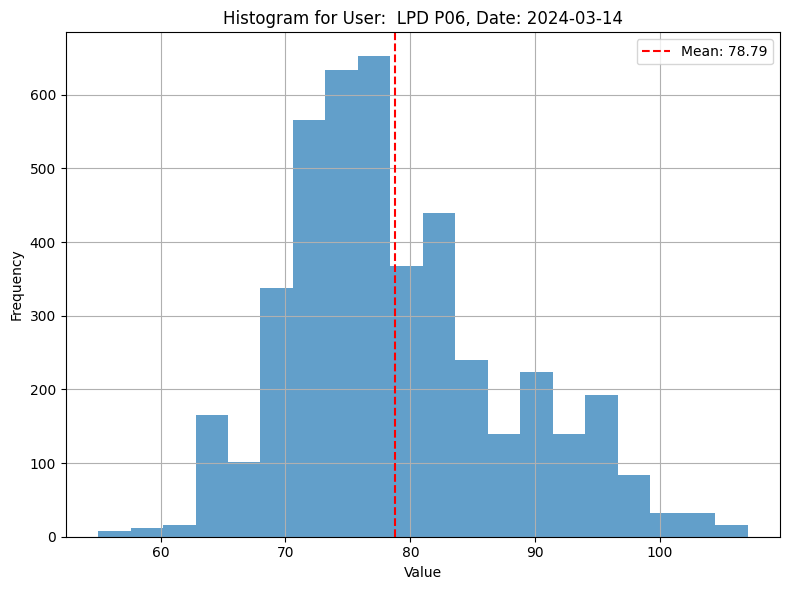

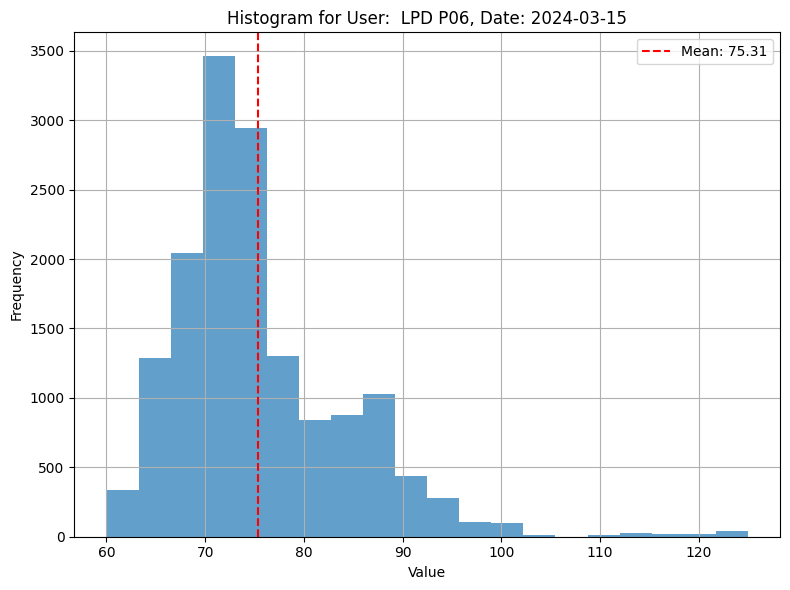

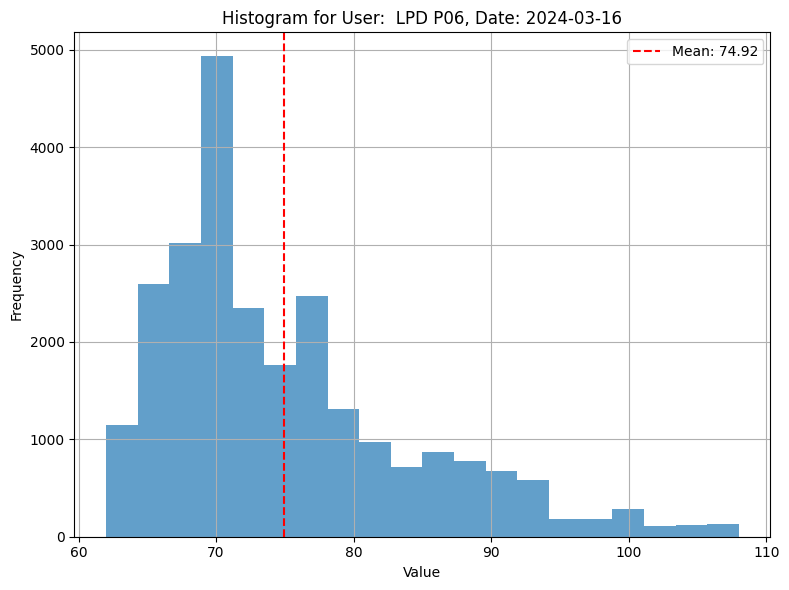

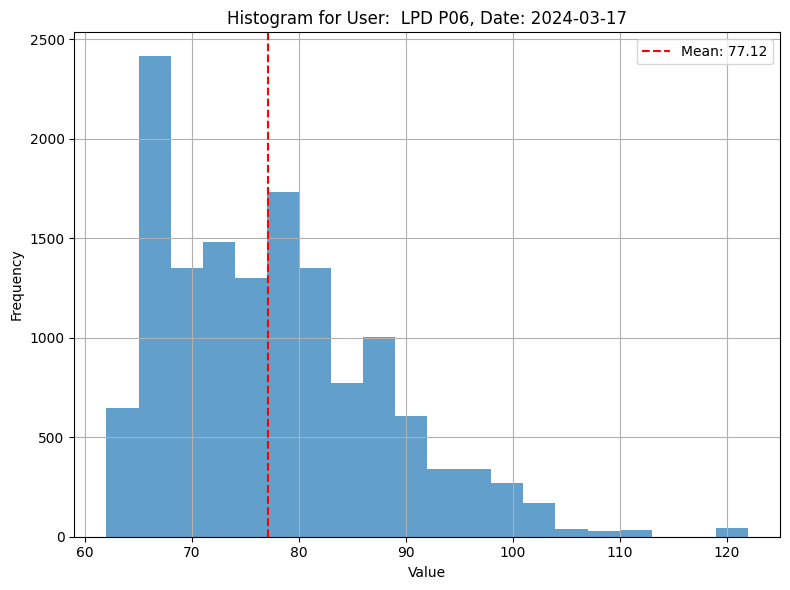

In [ ]:
# Convert 'date' column to datetime type
HearRate_df['date'] = pd.to_datetime(HearRate_df['date'])

# Group by 'userName' and 'date'
grouped_data = HearRate_df.groupby(['userName', 'date'])

# Plotting histograms for each user and each date
for (user, date), group_data in grouped_data:
    plt.figure(figsize=(8, 6))
    plt.hist(group_data['value'], bins=20, alpha=0.7)
    plt.title(f'Histogram for User: {user}, Date: {date.date()}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Calculate mean value for the current group
    mean_value = group_data['value'].mean()

    # Add vertical line representing the mean value
    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


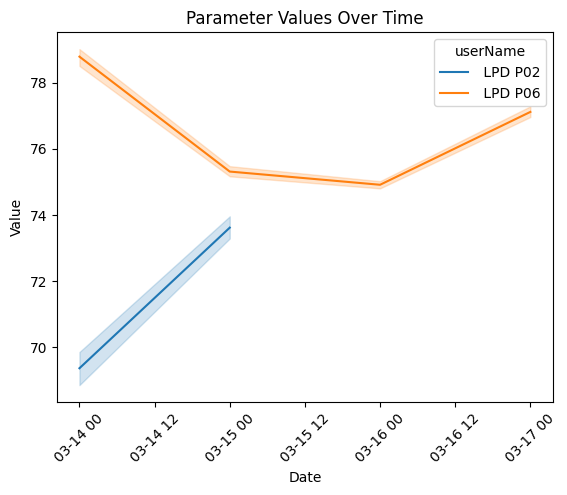

In [ ]:
# Time Series Analysis
sns.lineplot(x='date', y='value', hue='userName', data=HearRate_df)
plt.title('Parameter Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


The provided code segment processes heart rate data extracted from the 'HearRate_df' DataFrame, converting the 'time' column to datetime format and extracting the hour component. It then calculates the average heart rate for each hour of the day and each user, organizing the data into a matrix format suitable for visualization. This matrix is transformed into a heatmap, where rows represent hours of the day, columns represent users, and each cell denotes the average heart rate value. The resulting heatmap offers a visual representation of heart rate patterns across different users and hours, aiding in the identification of trends and variations in heart rate data.

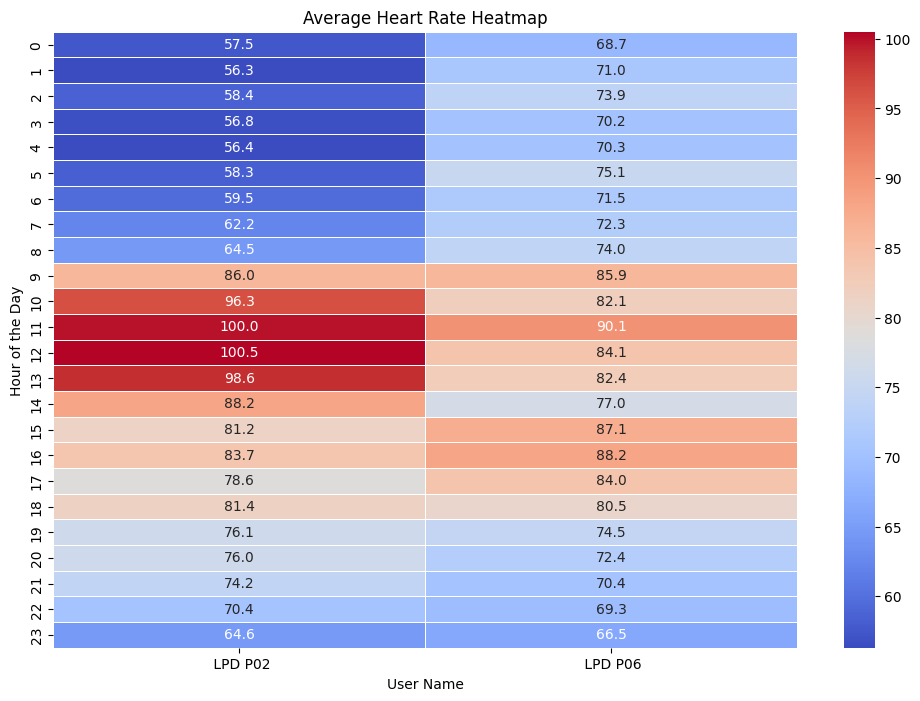

In [ ]:
# Convert 'time' column to datetime
HearRate_df['time'] = pd.to_datetime(HearRate_df['time'])

# Extract hour from 'time' column
HearRate_df['hour'] = HearRate_df['time'].dt.hour

# Calculate average heart rate for each hour of the day and each user
average_heart_rate = HearRate_df.groupby(['userName', 'hour'])['value'].mean().reset_index()

# Pivot the data to create a matrix where rows represent hours and columns represent users
heatmap_data = average_heart_rate.pivot(index='hour', columns='userName', values='value')

# Check if heatmap_data is empty
if heatmap_data.empty:
    print("No data available for heatmap.")
else:
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
    plt.title('Average Heart Rate Heatmap')
    plt.xlabel('User Name')
    plt.ylabel('Hour of the Day')

    plt.show()


# **Other Parameters**


The provided code segment aims to extract data related to parameters other than heart rate from a JSON file and structure it into a DataFrame.

In [ ]:
# Load the JSON data from a file
with open('/content/sample_data/SmartWatch-Data.json', 'r') as file:
    json_data = json.load(file)

# Extract the first set of data fields
first_data = []
for entry in json_data['data']:
    user_data = {
        'userName': entry['userName'],
        'userEmail': entry['userEmail'],
        'eventType': entry['eventType'],
        'receivedDate': entry['receivedDate']
    }
    first_data.append(user_data)

# Create a dataframe for the first set of data
first_df = pd.DataFrame(first_data)

# Extract the second set of data fields including time, value, and now userName
second_data = []
problematic_entries = []  # List to store problematic entries
for entry in json_data['data']:
    event_data = {
        'userName': entry['userName'],  # Add userName here
        'event': entry['data']['event'],
        'externalId': entry['data'].get('externalId', None),
        'brandId': entry['data'].get('brandId', None),
        'date': entry['data'].get('date', None),
        'version': entry['data'].get('version', None),
        'parameter': entry['data'].get('parameter', None),
        'time': None,
        'value': None
    }
    if 'data' in entry['data'] and isinstance(entry['data']['data'], list):
        for data_entry in entry['data']['data']:
            if isinstance(data_entry, dict) and 'time' in data_entry and 'value' in data_entry:
                event_data['time'] = data_entry['time']
                event_data['value'] = data_entry['value']
                second_data.append(event_data.copy())  # Make a copy to avoid overwriting
    else:
        problematic_entries.append(entry)  # Store problematic entry


print(problematic_entries)

[{'userName': ' LPD P02', 'userEmail': 'participant02@example.com', 'eventType': 'update', 'receivedDate': '2024-03-16T10:15:38.000Z', 'data': {'event': 'update', 'data': {'externalUserId': 'qMpLLXdiGK', 'brandId': '8', 'parameters': [{'value': 112, 'unit': 'bpm', 'parameter': 'max_heart_rate', 'parameter_id': 'max_heart_rate', 'date': '2024-03-15'}, {'value': 89, 'unit': 'bpm', 'parameter': 'average_heart_rate', 'parameter_id': 'average_heart_rate', 'date': '2024-03-15'}, {'value': 52, 'unit': 'bpm', 'parameter': 'min_heart_rate', 'parameter_id': 'min_heart_rate', 'date': '2024-03-15'}]}}}, {'userName': ' LPD P02', 'userEmail': 'participant02@example.com', 'eventType': 'update', 'receivedDate': '2024-03-16T10:15:40.000Z', 'data': {'event': 'update', 'data': {'externalUserId': 'qMpLLXdiGK', 'brandId': '8', 'parameters': [{'value': 112, 'unit': 'bpm', 'parameter': 'max_heart_rate', 'parameter_id': 'max_heart_rate', 'date': '2024-03-15'}, {'value': 94, 'unit': 'bpm', 'parameter': 'averag

In [ ]:
#problematic_entries contains all your data
rows = []
for entry in problematic_entries:
    userName = entry['userName'].strip()  # Trim whitespace
    userEmail = entry['userEmail']
    externalUserId = entry['data']['data']['externalUserId']
    brandId = entry['data']['data']['brandId']

    for parameter in entry['data']['data']['parameters']:
        row = {
            'userName': userName,
            'userEmail': userEmail,
            'externalUserId': externalUserId,
            'brandId': brandId,
            'value': parameter['value'],
            'unit': parameter['unit'],
            'parameter': parameter['parameter'],
            'parameter_id': parameter['parameter_id'],
            'date': parameter['date']
        }
        rows.append(row)

Solved_df = pd.DataFrame(rows)

In [ ]:
Solved_df

,userName,userEmail,externalUserId,brandId,value,unit,parameter,parameter_id,date
0,LPD P02,lpd.participant02@gmail.com,qMpLLXdiGK,8,112,bpm,max_heart_rate,max_heart_rate,2024-03-15
1,LPD P02,lpd.participant02@gmail.com,qMpLLXdiGK,8,89,bpm,average_heart_rate,average_heart_rate,2024-03-15
2,LPD P02,lpd.participant02@gmail.com,qMpLLXdiGK,8,52,bpm,min_heart_rate,min_heart_rate,2024-03-15
3,LPD P02,lpd.participant02@gmail.com,qMpLLXdiGK,8,112,bpm,max_heart_rate,max_heart_rate,2024-03-15
4,LPD P02,lpd.participant02@gmail.com,qMpLLXdiGK,8,94,bpm,average_heart_rate,average_heart_rate,2024-03-15
...,...,...,...,...,...,...,...,...,...
347,LPD P06,lpd.participant06@gmail.com,uQFfxOyBa9,8,69,bpm,average_heart_rate,average_heart_rate,2024-03-17
348,LPD P06,lpd.participant06@gmail.com,uQFfxOyBa9,8,62,bpm,min_heart_rate,min_heart_rate,2024-03-17
349,LPD P06,lpd.participant06@gmail.com,uQFfxOyBa9,8,122,bpm,max_heart_rate,max_heart_rate,2024-03-17
350,LPD P06,lpd.participant06@gmail.com,uQFfxOyBa9,8,68,bpm,average_heart_rate,average_heart_rate,2024-03-17


In [ ]:
print(Solved_df.columns)

Index(['userName', 'userEmail', 'externalUserId', 'brandId', 'value', 'unit',
       'parameter', 'parameter_id', 'date'],
      dtype='object')


In [ ]:
# Get unique values of the 'parameter' column
unique_parameters = Solved_df['parameter'].unique()

# Print the unique parameter values
print(unique_parameters)

['max_heart_rate' 'average_heart_rate' 'min_heart_rate' 'steps'
 'total_sleep_duration' 'deep_sleep_duration' 'rem_sleep_duration']


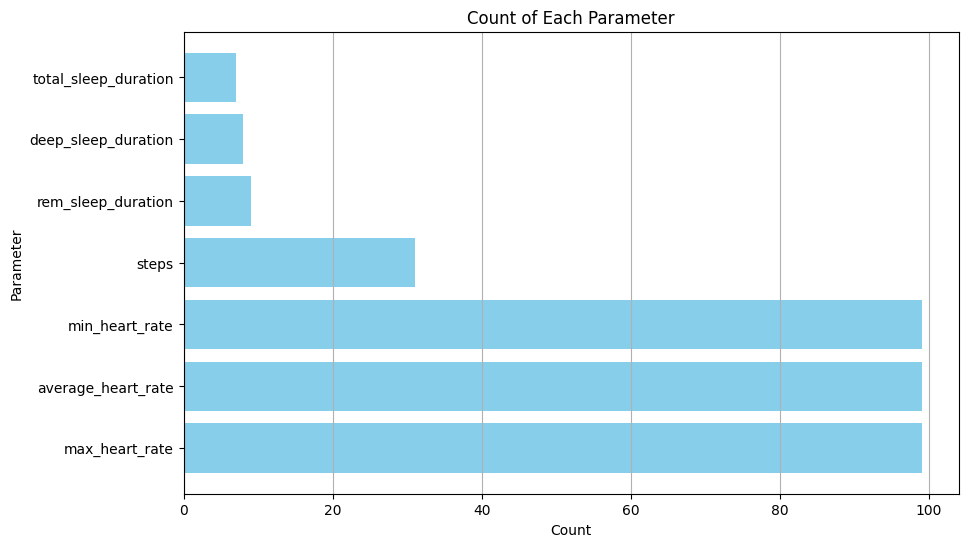

In [ ]:
# Count the occurrences of each parameter
parameter_counts = Solved_df['parameter'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(parameter_counts.index, parameter_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Parameter')
plt.title('Count of Each Parameter')
plt.grid(axis='x')
plt.show()


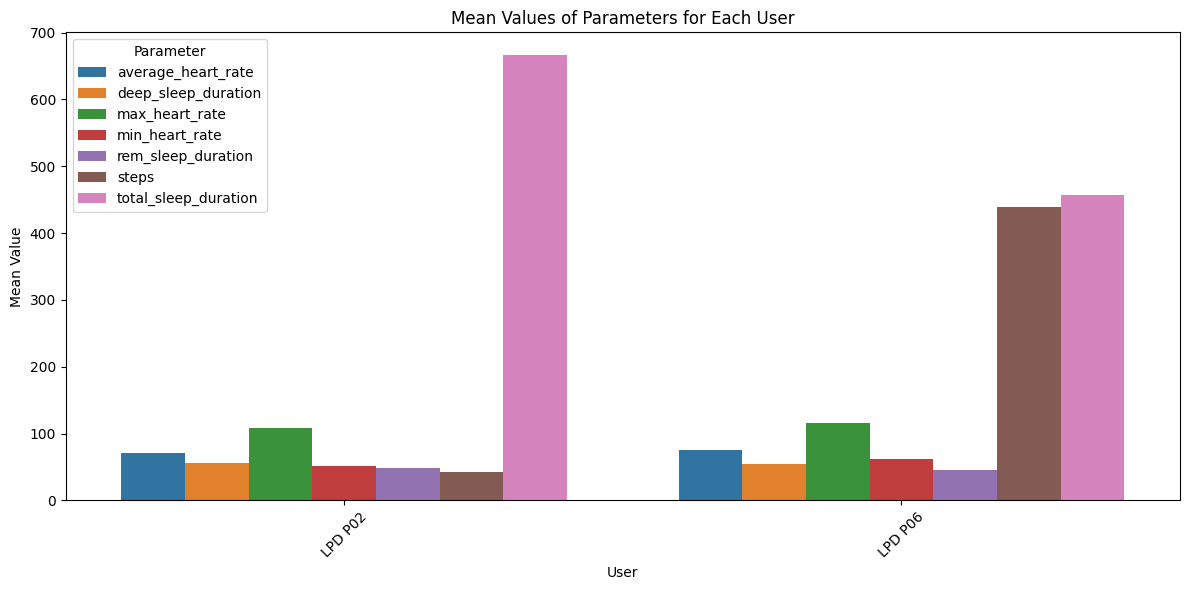

In [ ]:
# Calculate the mean or median values of parameters for each user
grouped_df = Solved_df.groupby(['userName', 'parameter'])['value'].mean()  # Change 'mean' to 'median' if needed

# Reset the index to make 'userName' and 'parameter' columns
grouped_df = grouped_df.reset_index()

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='userName', y='value', hue='parameter')
plt.title('Mean Values of Parameters for Each User')
plt.xlabel('User')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Parameter')
plt.tight_layout()
plt.show()


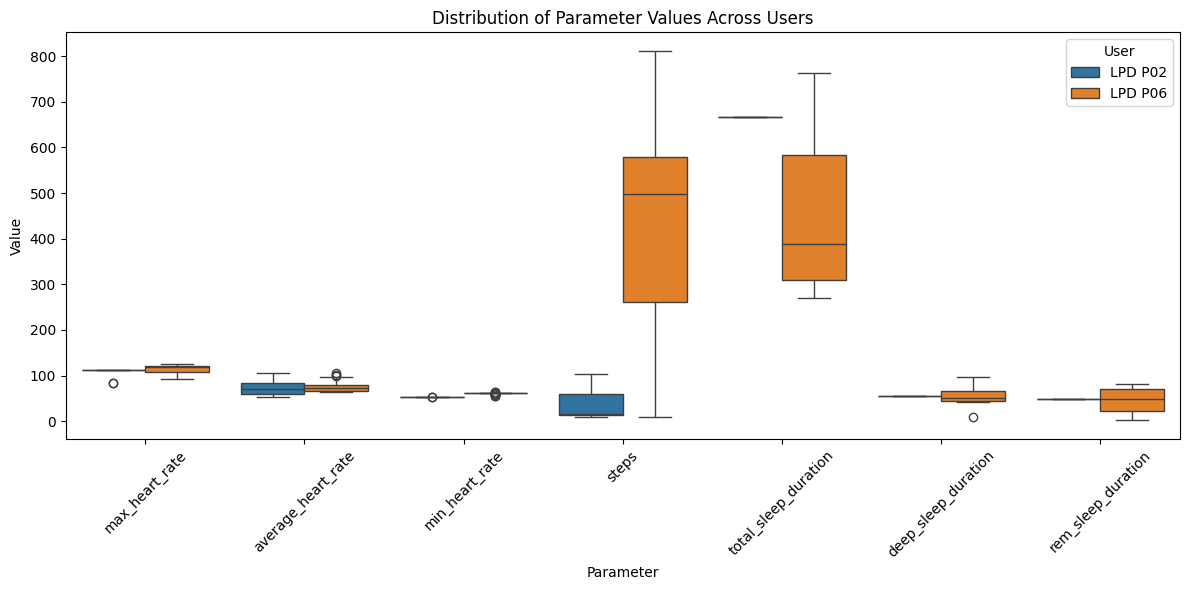

In [ ]:
# Plot boxplots for each parameter
plt.figure(figsize=(12, 6))
sns.boxplot(data=Solved_df, x='parameter', y='value', hue='userName')
plt.title('Distribution of Parameter Values Across Users')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='User')
plt.tight_layout()
plt.show()


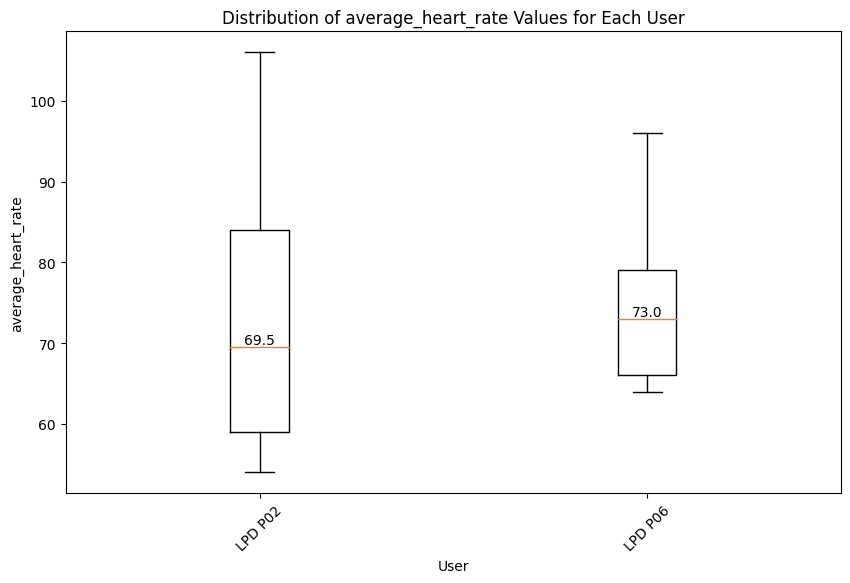

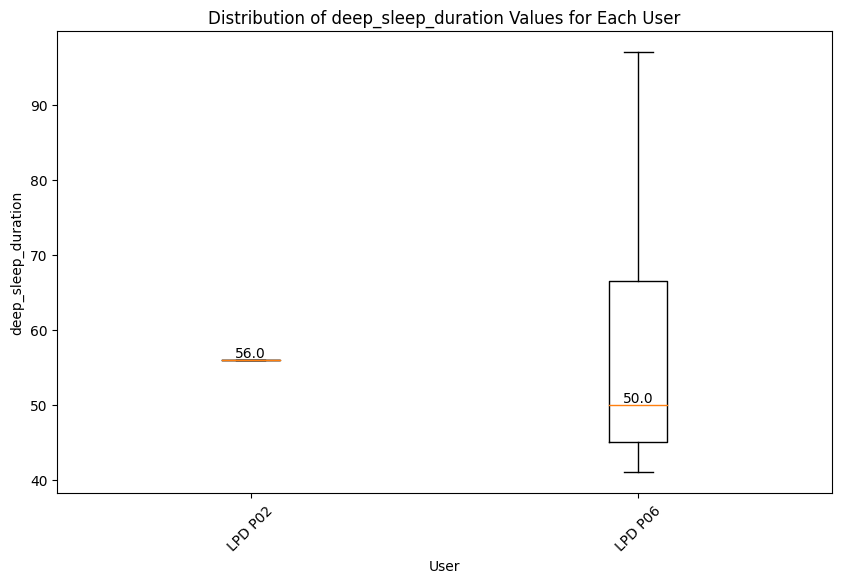

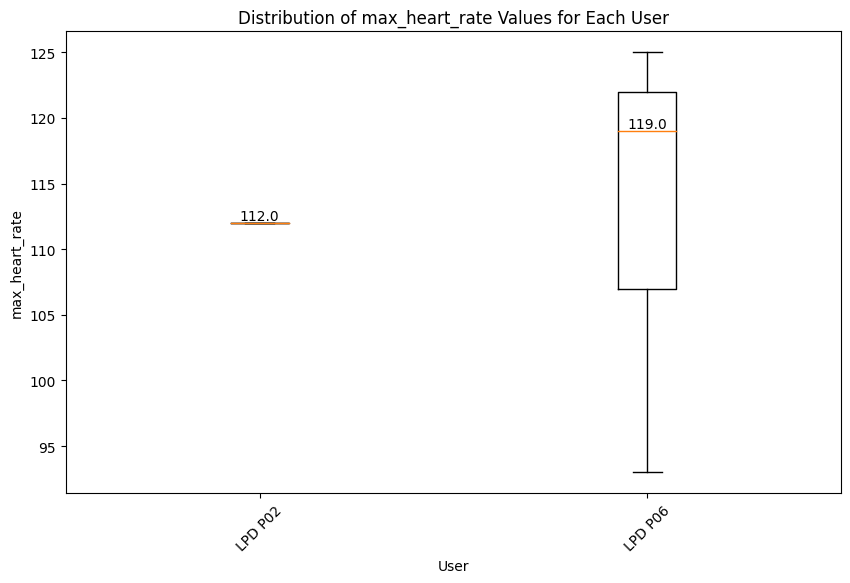

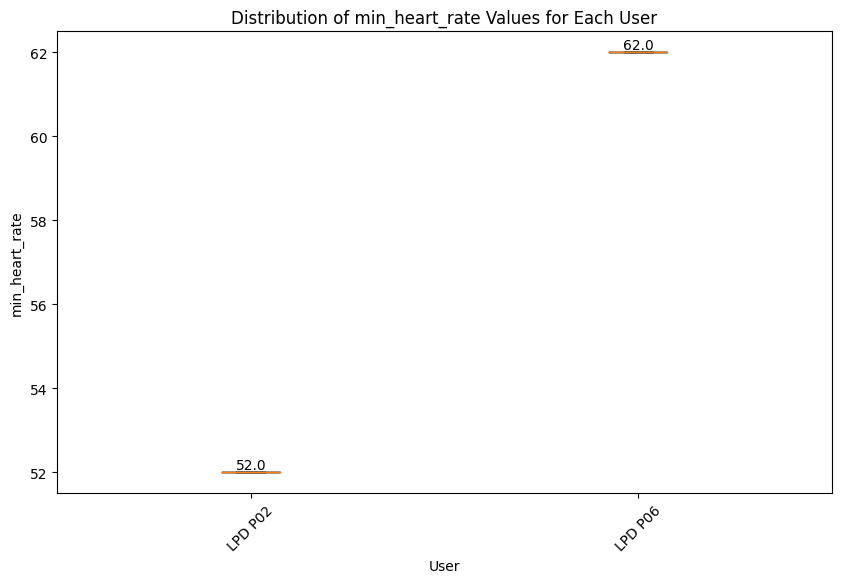

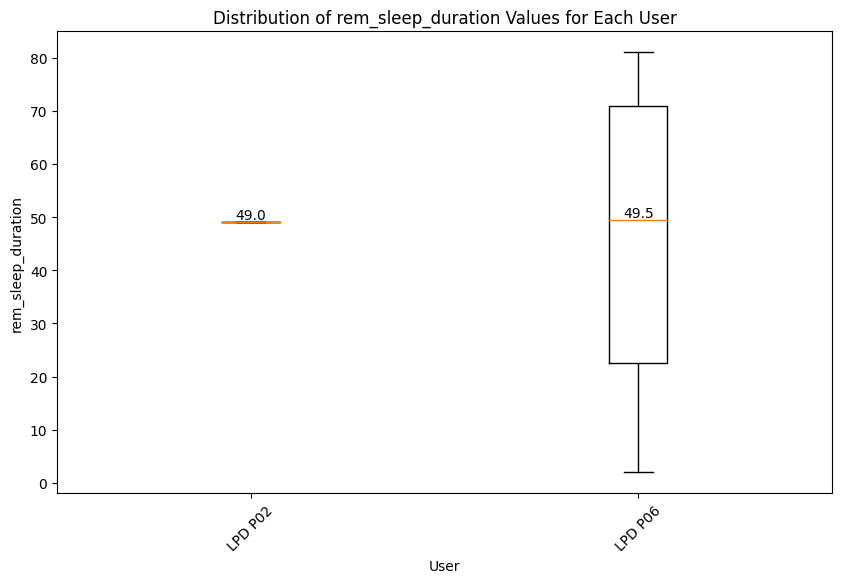

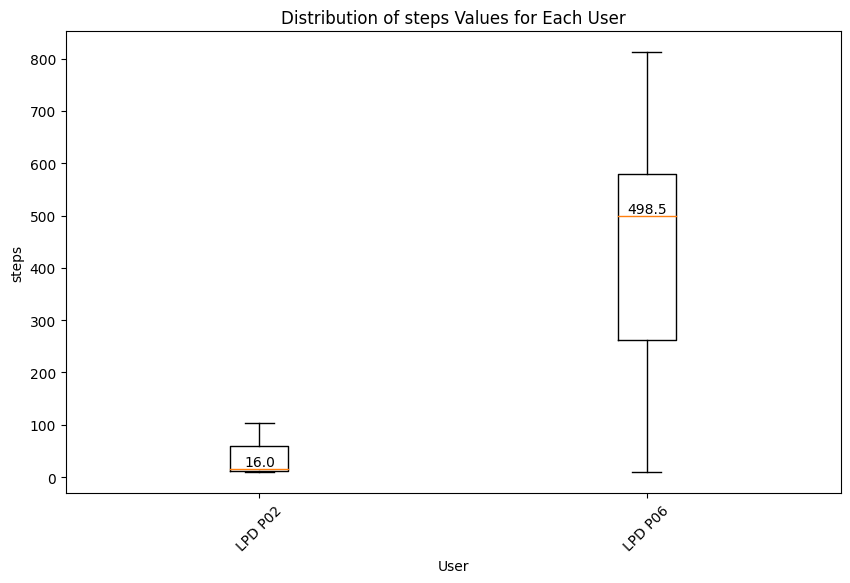

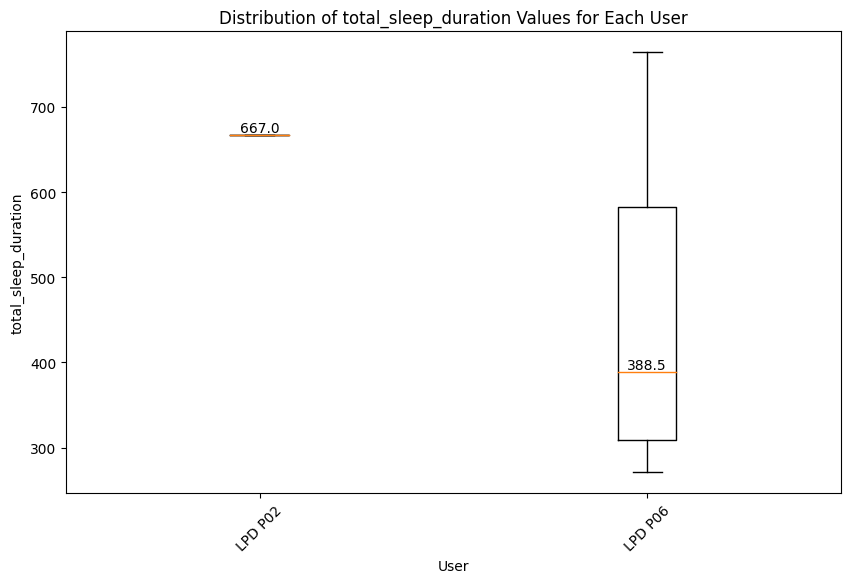

In [ ]:
# Group the DataFrame by 'parameter' to create separate groups for each parameter
grouped_df = Solved_df.groupby('parameter')

# Iterate over each parameter
for parameter, group in grouped_df:
    # Initialize an empty list to store parameter values for each user
    parameter_data = []

    # Extract parameter values for each user and store them in the list
    for user_name, user_group in group.groupby('userName'):
        parameter_data.append(user_group['value'].values)

    # Create a box plot for the current parameter
    plt.figure(figsize=(10, 6))
    boxplot = plt.boxplot(parameter_data, labels=grouped_df.get_group(parameter)['userName'].unique(), showfliers=False)

    # Add median values to each boxplot
    for i, user_name in enumerate(grouped_df.get_group(parameter)['userName'].unique()):
        median = np.median(parameter_data[i])
        plt.text(i + 1, median, f'{median}', horizontalalignment='center', verticalalignment='bottom')

    plt.title(f'Distribution of {parameter} Values for Each User')
    plt.xlabel('User')
    plt.ylabel(parameter)
    plt.xticks(rotation=45)
    plt.show()


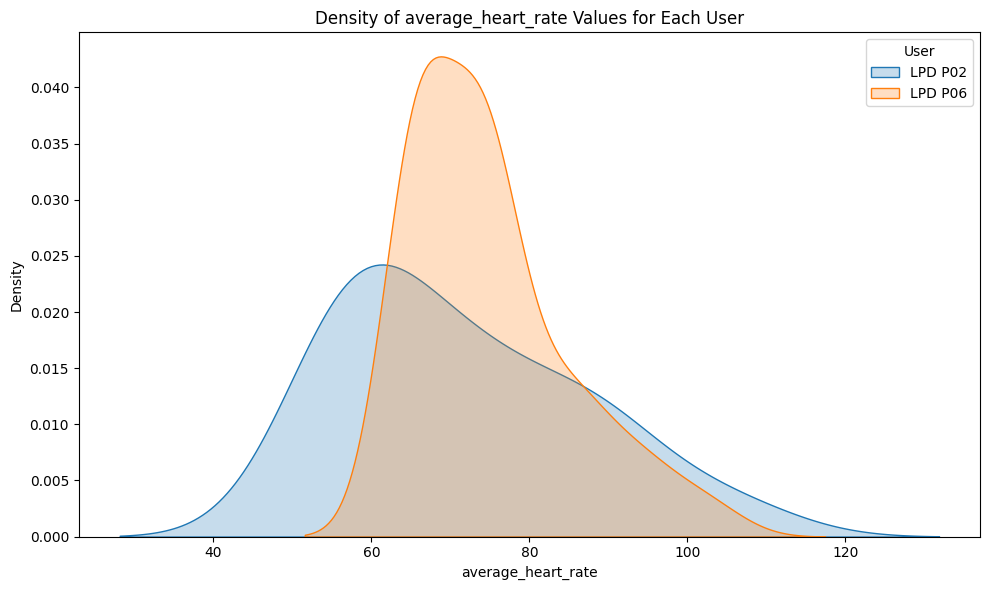

<ipython-input-16-aeb0e6e3a254>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=user_group, x='value', fill=True, label=user_name)


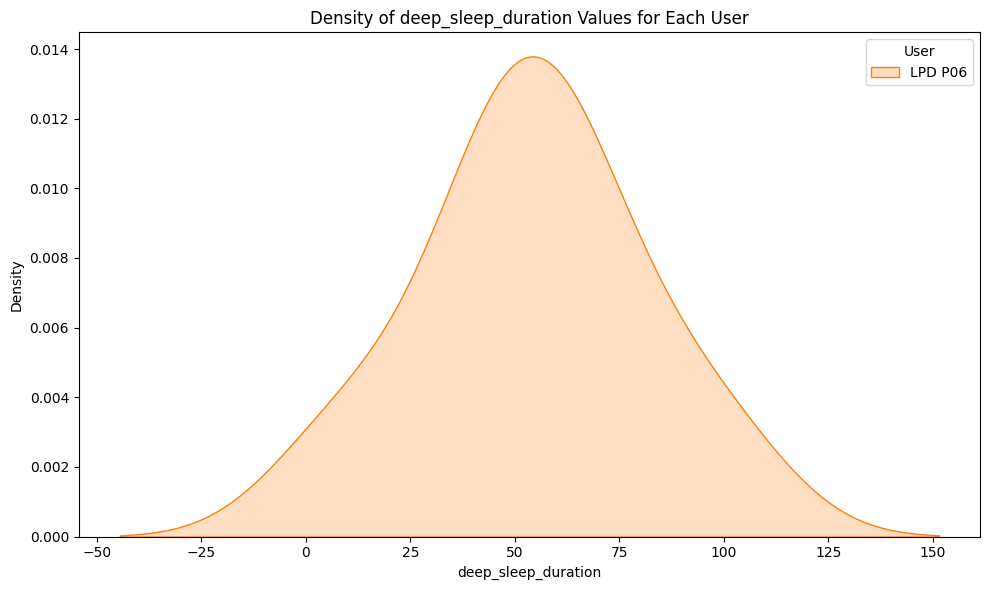

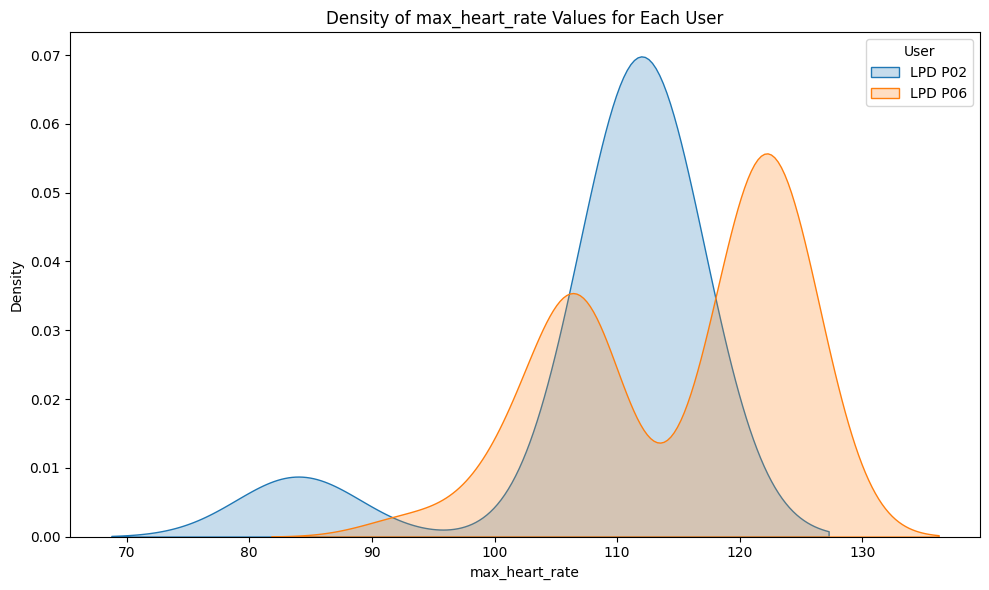

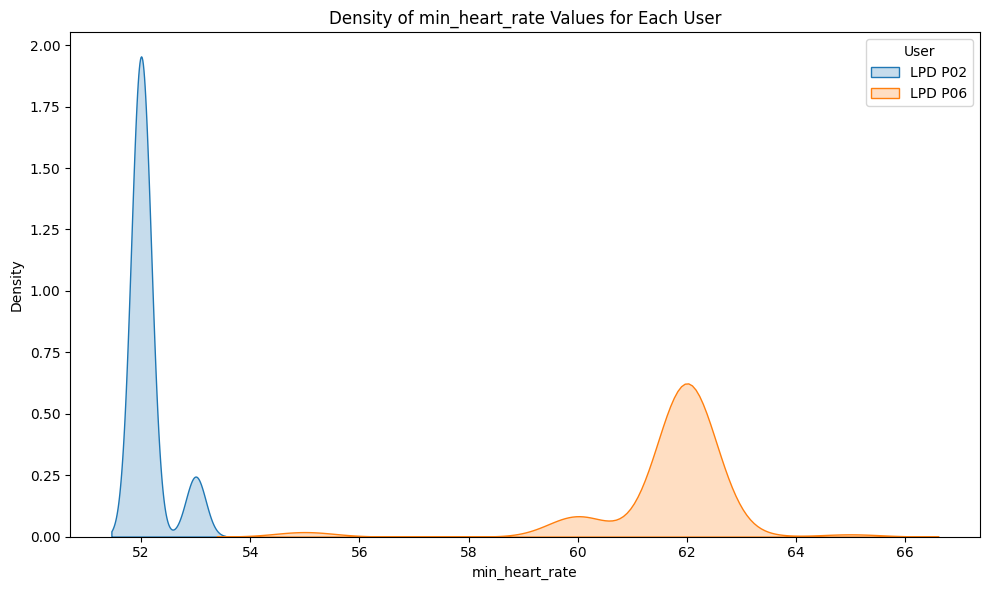

<ipython-input-16-aeb0e6e3a254>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=user_group, x='value', fill=True, label=user_name)


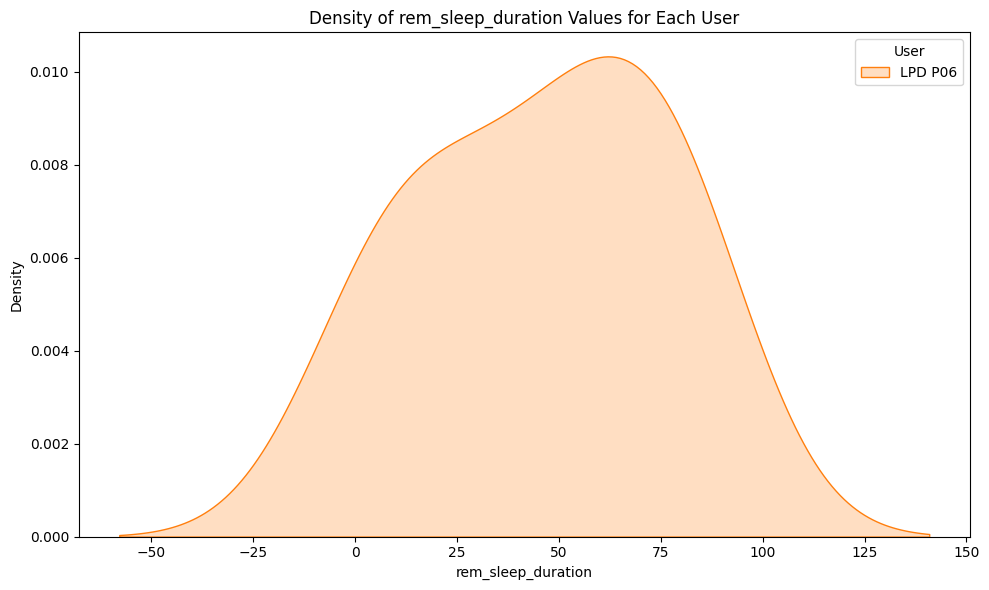

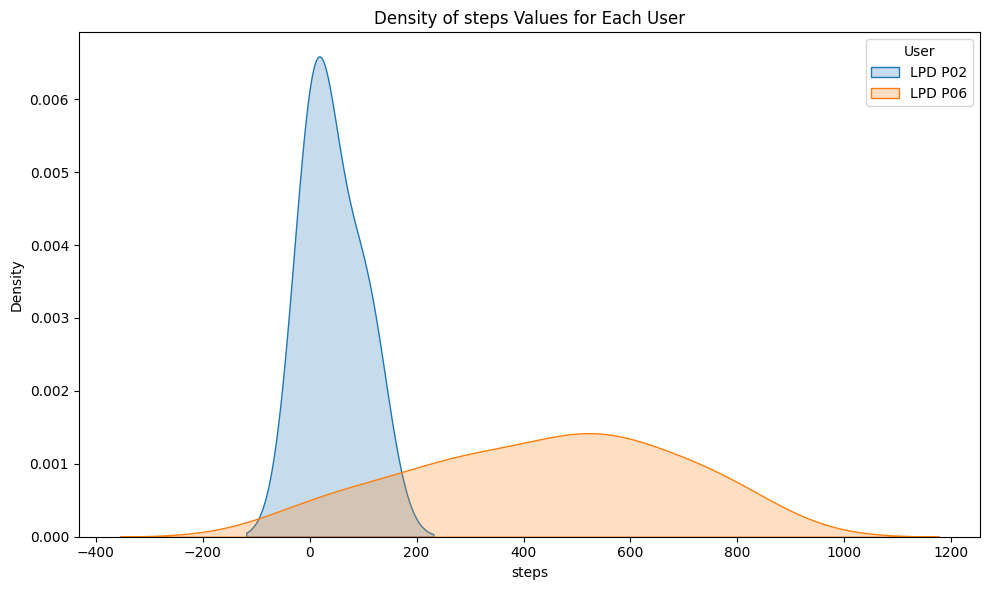

<ipython-input-16-aeb0e6e3a254>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=user_group, x='value', fill=True, label=user_name)


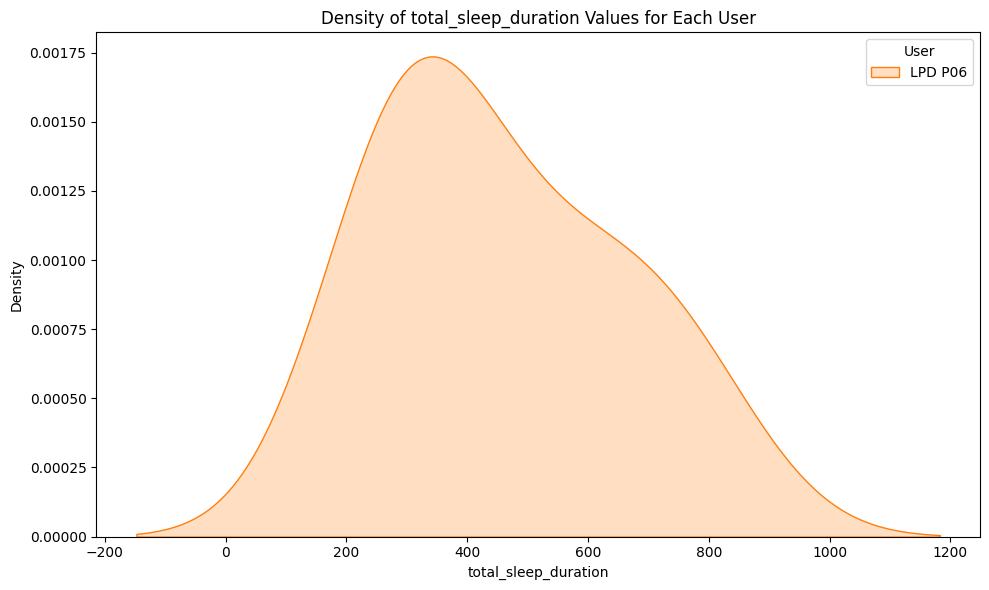

In [ ]:
# Group the DataFrame by 'parameter' to create separate groups for each parameter
grouped_df = Solved_df.groupby('parameter')

# Iterate over each parameter
for parameter, group in grouped_df:
    # Create a KDE plot for the current parameter
    plt.figure(figsize=(10, 6))
    for user_name, user_group in group.groupby('userName'):
        sns.kdeplot(data=user_group, x='value', fill=True, label=user_name)

    plt.title(f'Density of {parameter} Values for Each User')
    plt.xlabel(parameter)
    plt.ylabel('Density')
    plt.legend(title='User')
    plt.tight_layout()
    plt.show()


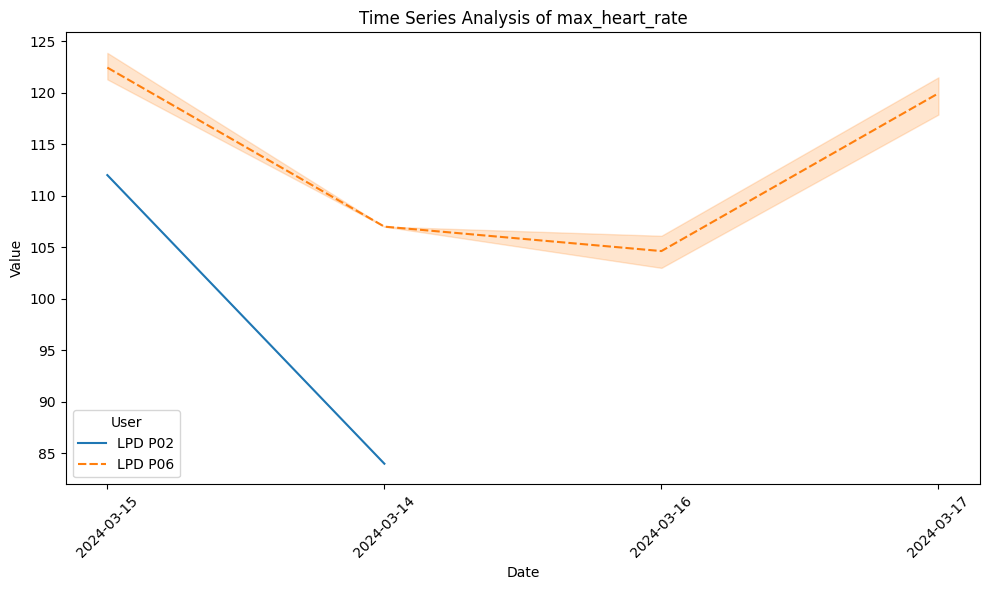

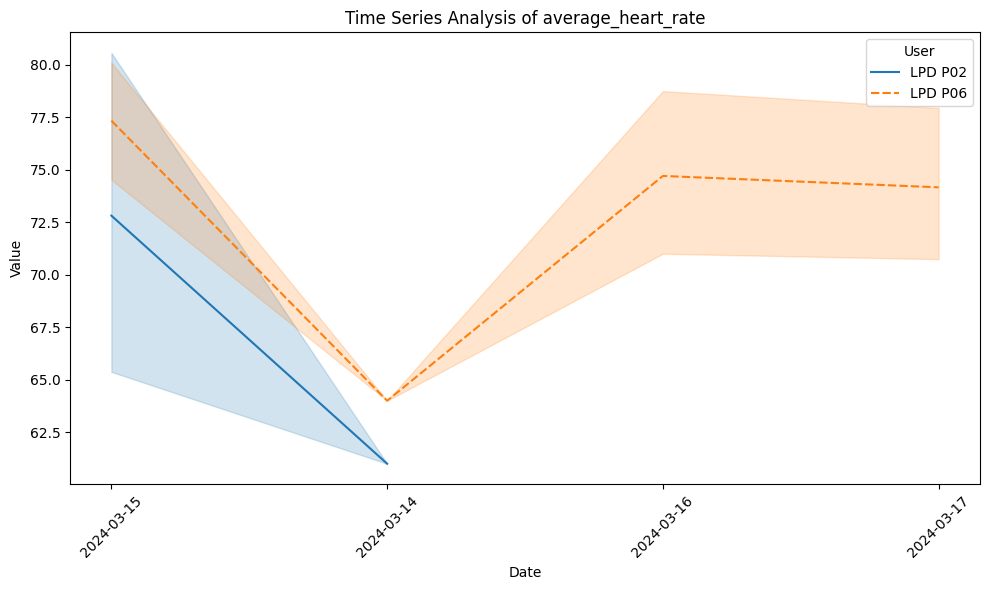

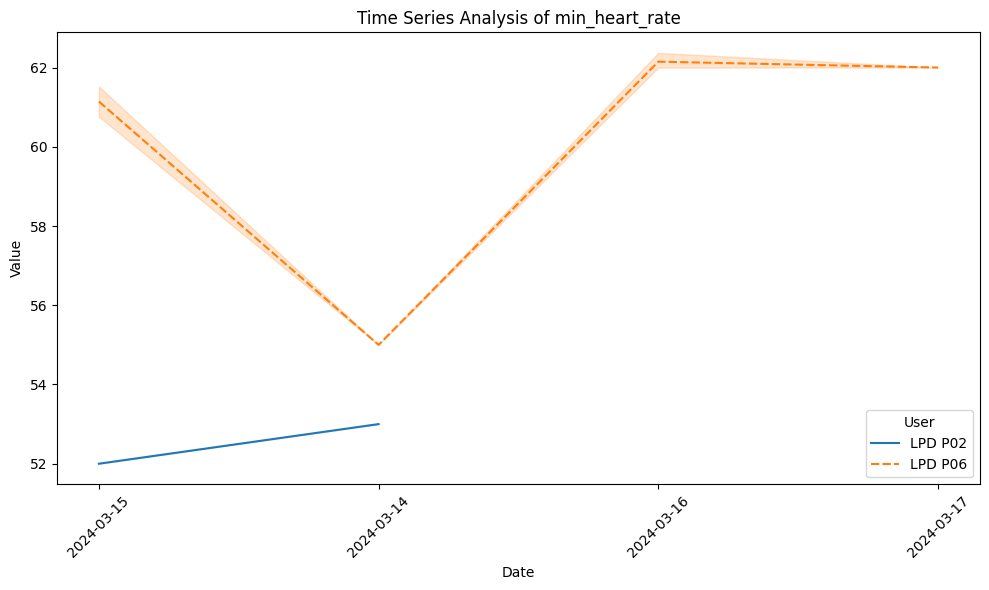

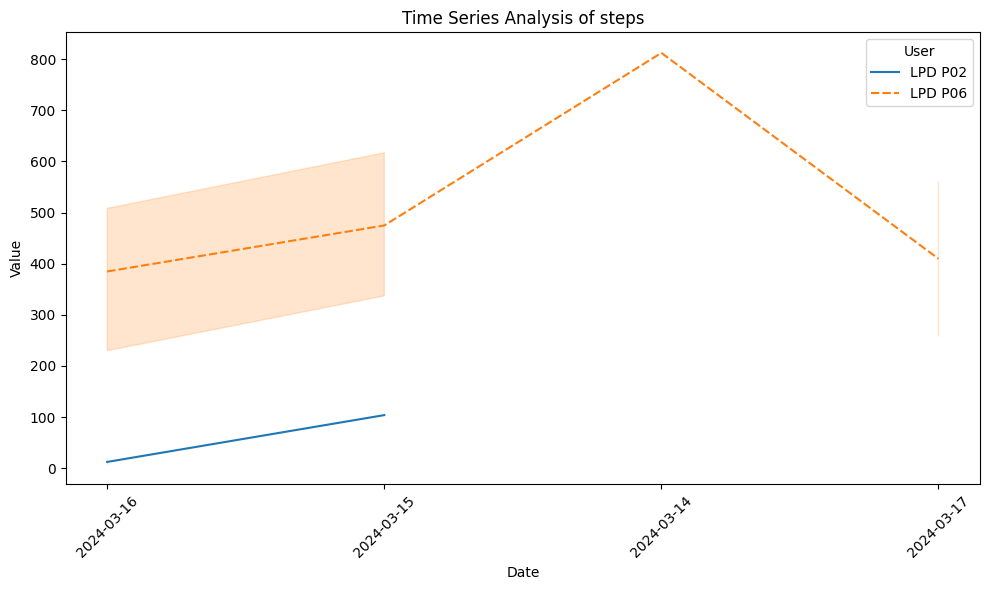

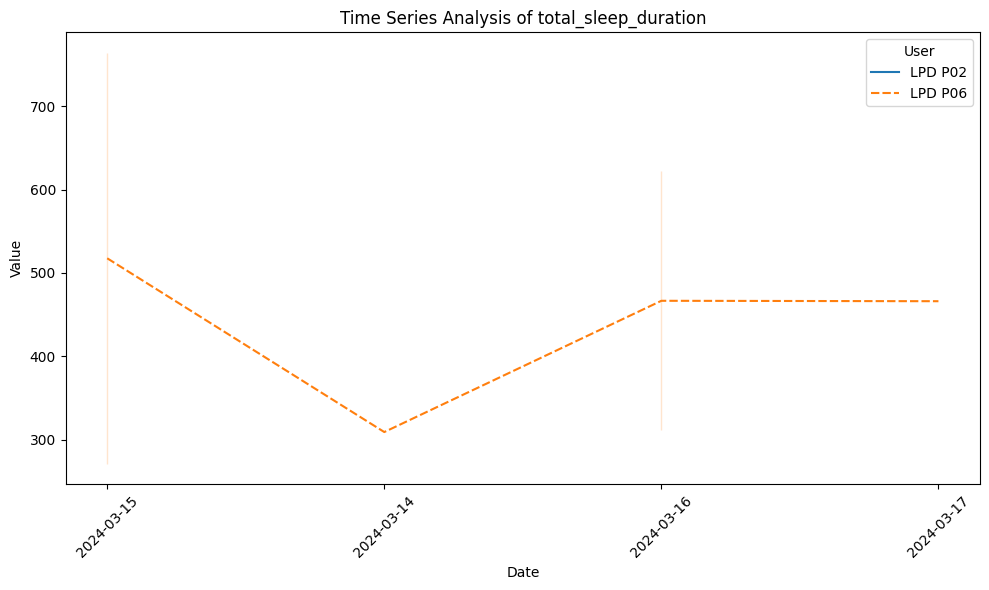

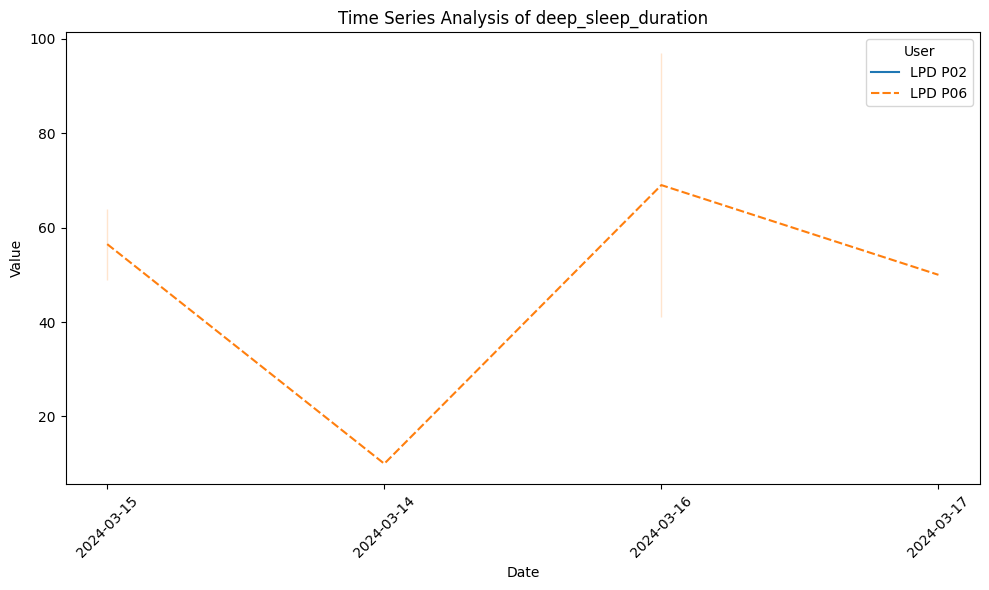

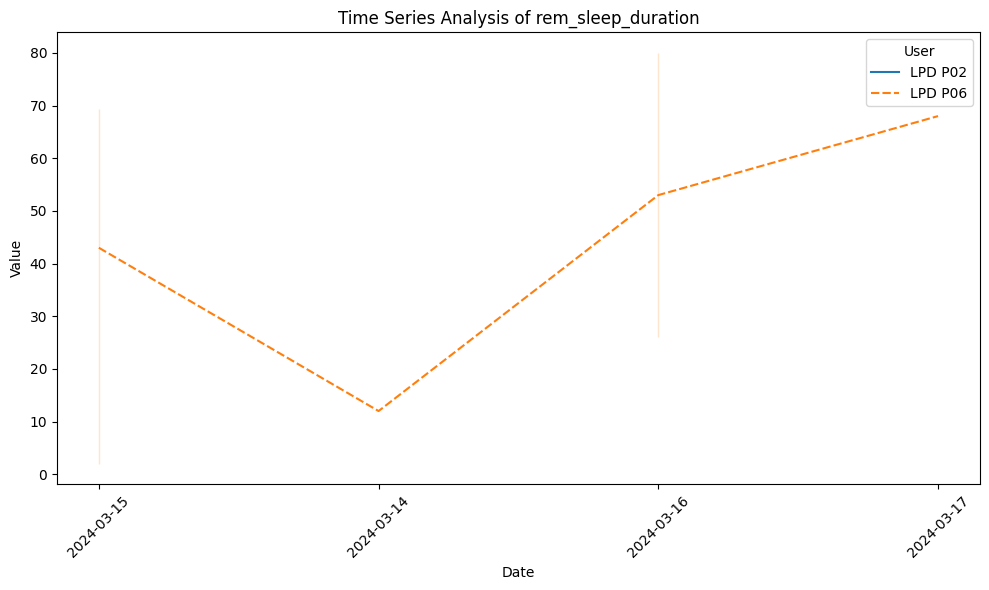

In [ ]:
# List of parameters
parameters = Solved_df['parameter'].unique()

# Create line plots for each parameter
for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='value', hue='userName', style="userName", data=Solved_df[Solved_df['parameter'] == param])
    plt.title(f'Time Series Analysis of {param}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend(title='User')
    plt.tight_layout()
    plt.show()
